# Arithmetic Derivatives Spike: D⁻¹, Commutators, and Cellular Automata

**A theoretical exploration of three interrelated ideas:**

1. **The Arithmetic Derivative Inverse D⁻¹** — What can the "antiderivative" tell us about primes and K?
2. **K and K₂ vs Riemann Zeroes** — Do the groovy and lucky commutators encode information about zeta zeros?
3. **Rule 110 and Primes** — Can Turing-complete cellular automata reveal prime structure?

---

## Background

The **arithmetic derivative** D is defined recursively:
- D(0) = D(1) = 0
- D(p) = 1 for any prime p
- D(ab) = aD(b) + bD(a) (product rule)

This gives us a calculus over the integers that respects multiplicative structure.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from functools import lru_cache
from collections import defaultdict
import sys
sys.path.insert(0, '.')

from src.groovy_commutator import primes_up_to, first_n_primes, GroovyCommutator

## Part 1: The Arithmetic Derivative and Its Inverse

### Computing D(n)

First, let's implement the arithmetic derivative properly using prime factorization.

In [2]:
def prime_factorization(n):
    """Return prime factorization as dict {prime: exponent}."""
    if n < 2:
        return {}
    factors = {}
    d = 2
    while d * d <= n:
        while n % d == 0:
            factors[d] = factors.get(d, 0) + 1
            n //= d
        d += 1
    if n > 1:
        factors[n] = factors.get(n, 0) + 1
    return factors

@lru_cache(maxsize=100000)
def arithmetic_derivative(n):
    """Compute D(n) using the formula: D(n) = n * Σ(eₚ/p) for n = Πp^eₚ."""
    if n < 2:
        return 0
    factors = prime_factorization(n)
    # D(n)/n = Σ(eₚ/p), so D(n) = n * Σ(eₚ/p)
    return int(n * sum(exp / prime for prime, exp in factors.items()))

# Verify: D(p) = 1 for primes
primes = first_n_primes(10)
print("D(p) for first 10 primes:", [arithmetic_derivative(p) for p in primes])

# Verify product rule: D(6) = D(2*3) = 2*D(3) + 3*D(2) = 2*1 + 3*1 = 5
print(f"D(6) = {arithmetic_derivative(6)} (should be 5)")
print(f"D(15) = {arithmetic_derivative(15)} (D(3*5) = 3*1 + 5*1 = 8)")

D(p) for first 10 primes: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
D(6) = 5 (should be 5)
D(15) = 8 (D(3*5) = 3*1 + 5*1 = 8)


### D⁻¹: The Arithmetic Antiderivative

**Question**: Given a value k, what integers n satisfy D(n) = k?

This is the "antiderivative" problem. Unlike calculus, D⁻¹(k) is a *set* not a function.

**Key observations**:
- D⁻¹(0) = {0, 1} (only 0 and 1 have derivative 0)
- D⁻¹(1) = {all primes} (every prime has derivative 1)
- D⁻¹(k) for k > 1 contains composites with specific factorization patterns

**Conjecture (Ufnarovski & Åhlander)**: For every integer k ≥ 0, the set D⁻¹(k) is non-empty.

In [3]:
def find_antiderivatives(k, max_n=10000):
    """Find all n ≤ max_n such that D(n) = k."""
    return [n for n in range(max_n + 1) if arithmetic_derivative(n) == k]

# Build the antiderivative sets for small k
print("Arithmetic Antiderivatives D⁻¹(k):")
print("=" * 50)
for k in range(16):
    antiderivs = find_antiderivatives(k, max_n=200)
    print(f"D⁻¹({k:2d}) = {antiderivs[:10]}{'...' if len(antiderivs) > 10 else ''}")

Arithmetic Antiderivatives D⁻¹(k):
D⁻¹( 0) = [0, 1, 103, 107, 197]
D⁻¹( 1) = [2, 3, 5, 7, 11, 13, 17, 19, 23, 29]...
D⁻¹( 2) = []
D⁻¹( 3) = []
D⁻¹( 4) = [4]
D⁻¹( 5) = [6]
D⁻¹( 6) = [9]
D⁻¹( 7) = [10]
D⁻¹( 8) = [15]
D⁻¹( 9) = [14]
D⁻¹(10) = [21, 25]
D⁻¹(11) = []
D⁻¹(12) = [8, 35]
D⁻¹(13) = [22, 33]
D⁻¹(14) = [26, 49]
D⁻¹(15) = []


### D⁻¹(1) and the Primes

The most important antiderivative set is D⁻¹(1) = {all primes}.

This means: **the primes are exactly characterized as the solutions to D(n) = 1**.

This gives us an alternative definition of primality through calculus!

In [4]:
# Verify: D⁻¹(1) ∩ [2, 100] should be exactly the primes in that range
antideriv_1 = set(find_antiderivatives(1, max_n=100))
primes_100 = set(primes_up_to(100))

print(f"D⁻¹(1) ∩ [0,100]: {sorted(antideriv_1)}")
print(f"Primes ≤ 100:     {sorted(primes_100)}")
print(f"\nAre they equal? {antideriv_1 == primes_100}")

D⁻¹(1) ∩ [0,100]: [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]
Primes ≤ 100:     [np.int64(2), np.int64(3), np.int64(5), np.int64(7), np.int64(11), np.int64(13), np.int64(17), np.int64(19), np.int64(23), np.int64(29), np.int64(31), np.int64(37), np.int64(41), np.int64(43), np.int64(47), np.int64(53), np.int64(59), np.int64(61), np.int64(67), np.int64(71), np.int64(73), np.int64(79), np.int64(83), np.int64(89), np.int64(97)]

Are they equal? True


### Distribution of |D⁻¹(k)|

How does the size of D⁻¹(k) grow? Does it relate to K or prime structure?

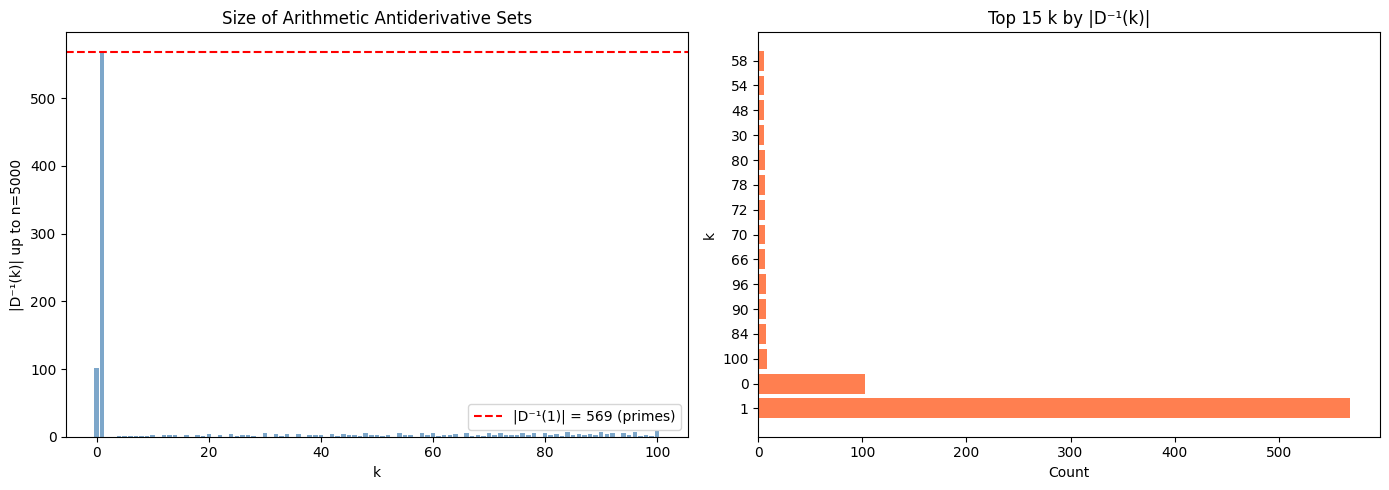


Most populated antiderivative sets:
  D⁻¹(1) has 569 elements: [2, 3, 5, 7, 11]...
  D⁻¹(0) has 102 elements: [0, 1, 103, 107, 197]...
  D⁻¹(100) has 8 elements: [114, 130, 291, 979, 1411]...
  D⁻¹(84) has 7 elements: [395, 803, 923, 1139, 1403]...
  D⁻¹(90) has 7 elements: [581, 869, 1241, 1541, 1769]...
  D⁻¹(96) has 7 elements: [92, 623, 1079, 1343, 1679]...
  D⁻¹(66) has 6 elements: [305, 413, 689, 893, 989]...
  D⁻¹(70) has 6 elements: [78, 201, 649, 901, 1081]...
  D⁻¹(72) has 6 elements: [68, 335, 671, 767, 1247]...
  D⁻¹(78) has 6 elements: [365, 497, 737, 1037, 1457]...


In [5]:
# Count |D⁻¹(k)| for k up to some limit
max_k = 100
max_n = 5000

# Build reverse mapping: D(n) -> list of n values
derivative_preimages = defaultdict(list)
for n in range(max_n + 1):
    d = arithmetic_derivative(n)
    if d <= max_k:
        derivative_preimages[d].append(n)

# Plot the distribution
k_values = list(range(max_k + 1))
counts = [len(derivative_preimages[k]) for k in k_values]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart of counts
axes[0].bar(k_values, counts, alpha=0.7, color='steelblue')
axes[0].axhline(y=counts[1], color='red', linestyle='--', label=f'|D⁻¹(1)| = {counts[1]} (primes)')
axes[0].set_xlabel('k')
axes[0].set_ylabel('|D⁻¹(k)| up to n=' + str(max_n))
axes[0].set_title('Size of Arithmetic Antiderivative Sets')
axes[0].legend()

# Which k have the most antiderivatives?
sorted_by_count = sorted(enumerate(counts), key=lambda x: -x[1])[:15]
axes[1].barh([str(k) for k, c in sorted_by_count], [c for k, c in sorted_by_count], color='coral')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('k')
axes[1].set_title('Top 15 k by |D⁻¹(k)|')

plt.tight_layout()
plt.savefig('images/antiderivative_distribution.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nMost populated antiderivative sets:")
for k, count in sorted_by_count[:10]:
    examples = derivative_preimages[k][:5]
    print(f"  D⁻¹({k}) has {count} elements: {examples}...")

### Connecting D⁻¹ to K

Recall the lucky commutator K₂(n) = D(n+1) - D(n) - 1.

If we sum K₂ from a to b-1, we get:
$$\sum_{n=a}^{b-1} K_2(n) = D(b) - D(a) - (b - a)$$

When D(a) = D(b) (same antiderivative class), this simplifies to -(b-a).

**Key insight**: Elements of the same D⁻¹(k) class are linked by this telescoping sum!

In [6]:
def K2(n):
    """Lucky commutator: K₂(n) = D(n+1) - D(n) - 1"""
    return arithmetic_derivative(n + 1) - arithmetic_derivative(n) - 1

def sum_K2(a, b):
    """Sum K₂ from a to b-1."""
    return sum(K2(n) for n in range(a, b))

# Verify the telescoping property
print("Telescoping property verification:")
print("For elements in the same D⁻¹(k), Σ K₂ = -(b-a)")
print("=" * 50)

# Test with primes (all in D⁻¹(1))
primes_20 = first_n_primes(20)
for i in range(5):
    p1, p2 = primes_20[i], primes_20[i + 5]
    actual = sum_K2(p1, p2)
    expected = -(p2 - p1)
    print(f"Primes {p1} to {p2}: Σ K₂ = {actual}, -(gap) = {expected}, match: {actual == expected}")

Telescoping property verification:
For elements in the same D⁻¹(k), Σ K₂ = -(b-a)
Primes 2 to 13: Σ K₂ = -11, -(gap) = -11, match: True
Primes 3 to 17: Σ K₂ = -14, -(gap) = -14, match: True
Primes 5 to 19: Σ K₂ = -14, -(gap) = -14, match: True
Primes 7 to 23: Σ K₂ = -16, -(gap) = -16, match: True
Primes 11 to 29: Σ K₂ = -18, -(gap) = -18, match: True


### D⁻¹ Structure: Chains and Orbits

An interesting structure emerges when we look at **derivative chains**: n → D(n) → D(D(n)) → ...

These chains either:
1. Terminate at 0 (when we hit a prime or 1)
2. Enter a fixed point (D(n) = n, which only happens for n = p^p for prime p)

The primes are special: they're exactly one step away from 0 in this chain.

In [7]:
def derivative_chain(n, max_steps=20):
    """Compute the chain n → D(n) → D(D(n)) → ... until 0 or cycle."""
    chain = [n]
    seen = {n}
    for _ in range(max_steps):
        d = arithmetic_derivative(chain[-1])
        chain.append(d)
        if d == 0 or d in seen:
            break
        seen.add(d)
    return chain

print("Derivative chains (n → D(n) → D²(n) → ...):")
print("=" * 60)

test_values = [2, 3, 4, 5, 6, 8, 9, 10, 12, 15, 16, 27, 32, 64, 81, 100]
for n in test_values:
    chain = derivative_chain(n)
    print(f"{n:4d}: {' → '.join(map(str, chain))}")

# Find fixed points: D(n) = n means n = p^p
print("\nFixed points (D(n) = n):")
for p in [2, 3, 5, 7]:
    n = p ** p
    print(f"  {p}^{p} = {n}, D({n}) = {arithmetic_derivative(n)}")

Derivative chains (n → D(n) → D²(n) → ...):
   2: 2 → 1 → 0
   3: 3 → 1 → 0
   4: 4 → 4
   5: 5 → 1 → 0
   6: 6 → 5 → 1 → 0
   8: 8 → 12 → 16 → 32 → 80 → 176 → 368 → 752 → 1520 → 3424 → 8592 → 20096 → 70464 → 235072 → 705280 → 3023616 → 13223679 → 10334491 → 316103 → 21539 → 4463
   9: 9 → 6 → 5 → 1 → 0
  10: 10 → 7 → 1 → 0
  12: 12 → 16 → 32 → 80 → 176 → 368 → 752 → 1520 → 3424 → 8592 → 20096 → 70464 → 235072 → 705280 → 3023616 → 13223679 → 10334491 → 316103 → 21539 → 4463 → 1
  15: 15 → 8 → 12 → 16 → 32 → 80 → 176 → 368 → 752 → 1520 → 3424 → 8592 → 20096 → 70464 → 235072 → 705280 → 3023616 → 13223679 → 10334491 → 316103 → 21539
  16: 16 → 32 → 80 → 176 → 368 → 752 → 1520 → 3424 → 8592 → 20096 → 70464 → 235072 → 705280 → 3023616 → 13223679 → 10334491 → 316103 → 21539 → 4463 → 1 → 0
  27: 27 → 27
  32: 32 → 80 → 176 → 368 → 752 → 1520 → 3424 → 8592 → 20096 → 70464 → 235072 → 705280 → 3023616 → 13223679 → 10334491 → 316103 → 21539 → 4463 → 1 → 0
  64: 64 → 192 → 640 → 2368 → 7168 → 3686

### Chain Length as a Measure of "Compositeness"

The length of the derivative chain measures how "composite" a number is:
- Primes have chain length 2: p → 1 → 0
- Prime powers p^k have longer chains
- Highly composite numbers have the longest chains

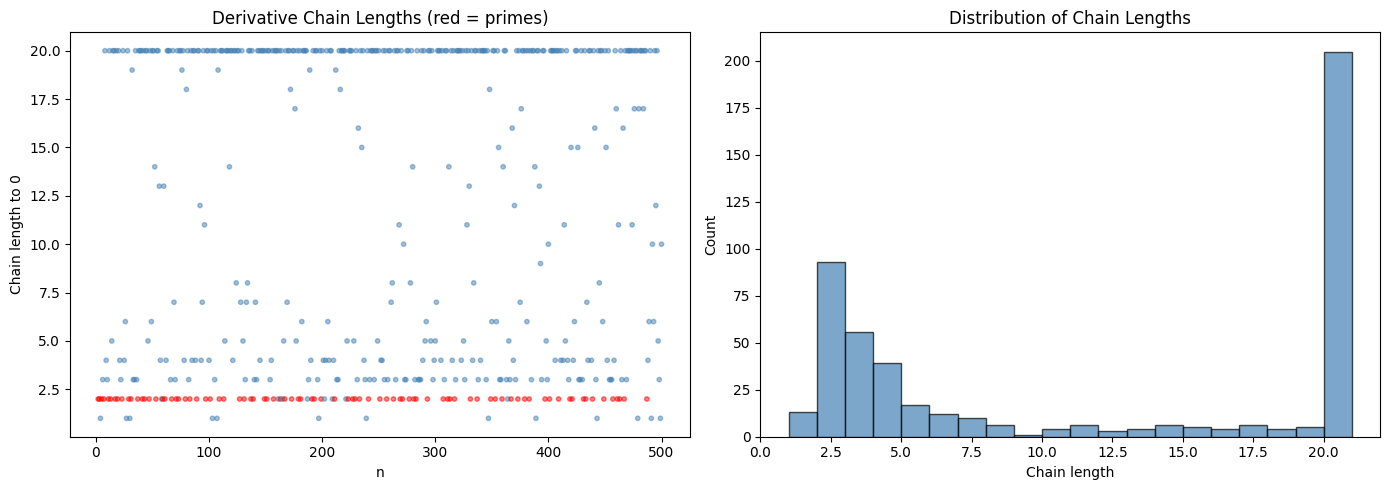


Numbers with longest derivative chains:
  8: length 20, chain = [8, 12, 16, 32, 80, 176, 368, 752, 1520, 3424, 8592, 20096, 70464, 235072, 705280, 3023616, 13223679, 10334491, 316103, 21539, 4463]
  12: length 20, chain = [12, 16, 32, 80, 176, 368, 752, 1520, 3424, 8592, 20096, 70464, 235072, 705280, 3023616, 13223679, 10334491, 316103, 21539, 4463, 1]
  15: length 20, chain = [15, 8, 12, 16, 32, 80, 176, 368, 752, 1520, 3424, 8592, 20096, 70464, 235072, 705280, 3023616, 13223679, 10334491, 316103, 21539]
  16: length 20, chain = [16, 32, 80, 176, 368, 752, 1520, 3424, 8592, 20096, 70464, 235072, 705280, 3023616, 13223679, 10334491, 316103, 21539, 4463, 1, 0]
  18: length 20, chain = [18, 20, 24, 44, 48, 112, 240, 608, 1552, 3120, 8144, 16304, 32624, 65264, 130544, 264928, 678448, 1356912, 4979232, 19424015, 7133373]
  20: length 20, chain = [20, 24, 44, 48, 112, 240, 608, 1552, 3120, 8144, 16304, 32624, 65264, 130544, 264928, 678448, 1356912, 4979232, 19424015, 7133373, 7682444]
  24

In [8]:
# Compute chain lengths for all n up to some limit
max_n = 500
chain_lengths = []
for n in range(2, max_n + 1):
    chain = derivative_chain(n)
    chain_lengths.append((n, len(chain) - 1))  # -1 because we don't count n itself

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

ns, lengths = zip(*chain_lengths)
colors = ['red' if arithmetic_derivative(n) == 1 else 'steelblue' for n in ns]

axes[0].scatter(ns, lengths, c=colors, alpha=0.5, s=10)
axes[0].set_xlabel('n')
axes[0].set_ylabel('Chain length to 0')
axes[0].set_title('Derivative Chain Lengths (red = primes)')

# Histogram of chain lengths
axes[1].hist(lengths, bins=range(1, max(lengths) + 2), alpha=0.7, color='steelblue', edgecolor='black')
axes[1].set_xlabel('Chain length')
axes[1].set_ylabel('Count')
axes[1].set_title('Distribution of Chain Lengths')

plt.tight_layout()
plt.savefig('images/derivative_chains.png', dpi=150, bbox_inches='tight')
plt.show()

# Numbers with longest chains
sorted_by_length = sorted(chain_lengths, key=lambda x: -x[1])[:10]
print("\nNumbers with longest derivative chains:")
for n, length in sorted_by_length:
    chain = derivative_chain(n)
    print(f"  {n}: length {length}, chain = {chain}")

---

## Part 2: K, K₂, and Riemann Zeroes

### The Riemann Hypothesis Connection

The Riemann zeta function ζ(s) has non-trivial zeros at s = ½ + iγ where γ is real.

The **explicit formula** connects primes to these zeros:
$$\psi(x) = x - \sum_\rho \frac{x^\rho}{\rho} - \frac{\zeta'(0)}{\zeta(0)} - \frac{1}{2}\log(1 - x^{-2})$$

where the sum is over non-trivial zeros ρ.

**Question**: Does cumulative K or K₂ encode information about these zeros?

In [9]:
# The first few Riemann zeta zeros (imaginary parts)
# These are the γ values where ζ(1/2 + iγ) = 0
RIEMANN_ZEROS = [
    14.134725, 21.022040, 25.010858, 30.424876, 32.935062,
    37.586178, 40.918720, 43.327073, 48.005151, 49.773832,
    52.970321, 56.446248, 59.347044, 60.831779, 65.112544,
    67.079811, 69.546402, 72.067158, 75.704691, 77.144840
]

print("First 20 Riemann zeta zeros (imaginary parts):")
print(RIEMANN_ZEROS)

First 20 Riemann zeta zeros (imaginary parts):
[14.134725, 21.02204, 25.010858, 30.424876, 32.935062, 37.586178, 40.91872, 43.327073, 48.005151, 49.773832, 52.970321, 56.446248, 59.347044, 60.831779, 65.112544, 67.079811, 69.546402, 72.067158, 75.704691, 77.14484]


### Cumulative K Near Riemann Zeros

Let's investigate whether cumulative K or K₂ shows any structure at integers near the Riemann zeros.

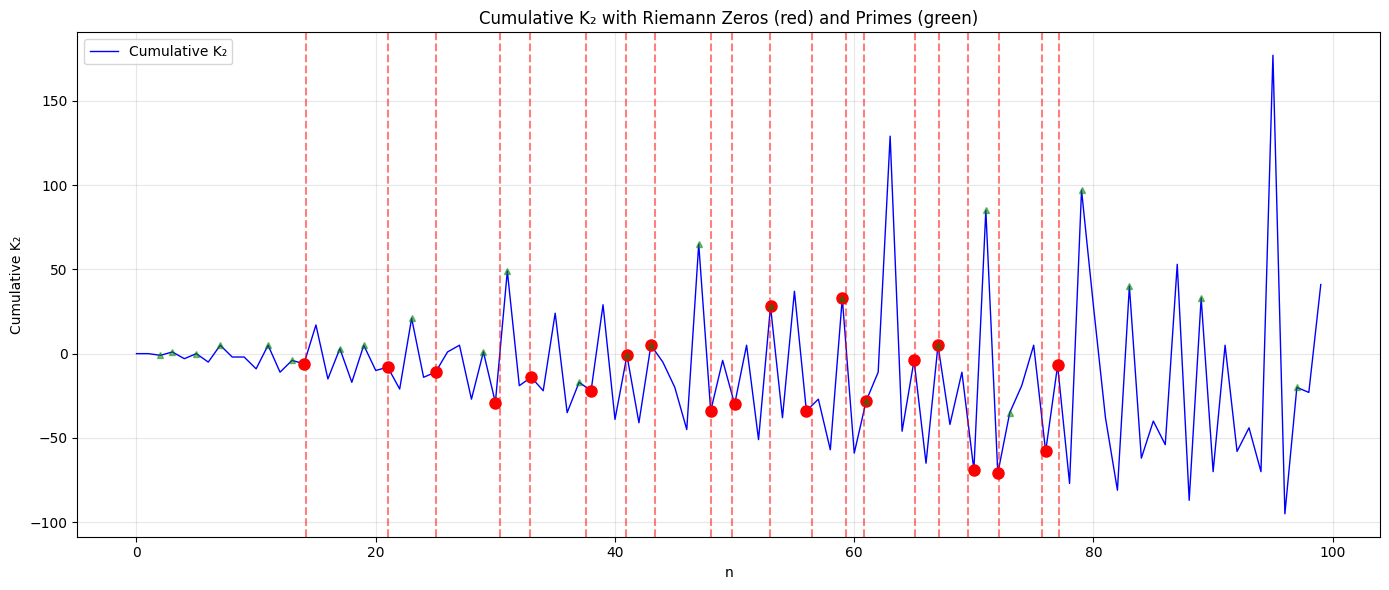

In [10]:
# Compute cumulative K₂ up to n
def cumulative_K2(max_n):
    """Compute cumulative K₂ values."""
    cum_k2 = [0]
    for n in range(1, max_n):
        cum_k2.append(cum_k2[-1] + K2(n))
    return cum_k2

# Compute up to beyond the largest zero we're considering
max_n = 100
cum_k2 = cumulative_K2(max_n)

# Plot cumulative K₂ with Riemann zeros marked
fig, ax = plt.subplots(figsize=(14, 6))

x = list(range(max_n))
ax.plot(x, cum_k2, 'b-', linewidth=1, label='Cumulative K₂')

# Mark Riemann zeros
for gamma in RIEMANN_ZEROS:
    if gamma < max_n:
        ax.axvline(x=gamma, color='red', alpha=0.5, linestyle='--')
        n_gamma = int(round(gamma))
        if n_gamma < len(cum_k2):
            ax.plot(n_gamma, cum_k2[n_gamma], 'ro', markersize=8)

# Mark primes
prime_set = set(primes_up_to(max_n))
for p in prime_set:
    if p < len(cum_k2):
        ax.plot(p, cum_k2[p], 'g^', markersize=5, alpha=0.5)

ax.set_xlabel('n')
ax.set_ylabel('Cumulative K₂')
ax.set_title('Cumulative K₂ with Riemann Zeros (red) and Primes (green)')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('images/k2_riemann_zeros.png', dpi=150, bbox_inches='tight')
plt.show()

### K₂ Values at Riemann Zero Integers

Let's examine the K₂ values at integers near the Riemann zeros.

In [11]:
print("K₂ values near Riemann zeros:")
print("=" * 70)
print(f"{'γ':>10} {'⌊γ⌋':>6} {'⌈γ⌉':>6} {'K₂(⌊γ⌋)':>10} {'K₂(⌈γ⌉)':>10} {'D(⌊γ⌋)':>10} {'Prime?':>8}")
print("-" * 70)

for gamma in RIEMANN_ZEROS:
    floor_g = int(gamma)
    ceil_g = floor_g + 1
    k2_floor = K2(floor_g)
    k2_ceil = K2(ceil_g)
    d_floor = arithmetic_derivative(floor_g)
    is_prime = "Yes" if d_floor == 1 else "No"
    print(f"{gamma:10.4f} {floor_g:6d} {ceil_g:6d} {k2_floor:10d} {k2_ceil:10d} {d_floor:10d} {is_prime:>8}")

K₂ values near Riemann zeros:
         γ    ⌊γ⌋    ⌈γ⌉    K₂(⌊γ⌋)    K₂(⌈γ⌉)     D(⌊γ⌋)   Prime?
----------------------------------------------------------------------
   14.1347     14     15         -2         23          9       No
   21.0220     21     22          2        -13         10       No
   25.0109     25     26          3         12         10       No
   30.4249     30     31        -30         78         30       No
   32.9351     32     33        -68          5         80       No
   37.5862     37     38         18         -5          1      Yes
   40.9187     40     41        -68         38         68       No
   43.3271     43     44         46        -10          1      Yes
   48.0052     48     49        -99         30        112       No
   49.7738     49     50         30        -26         14       No
   52.9703     52     53        -56         79         56       No
   56.4462     56     57        -71          7         92       No
   59.3470     59     60    

### Spectral Analysis: K₂ Fourier Transform

If K₂ encodes Riemann zero information, it might appear in the frequency domain.

The explicit formula suggests primes are a sum of oscillations at frequencies related to Riemann zeros.

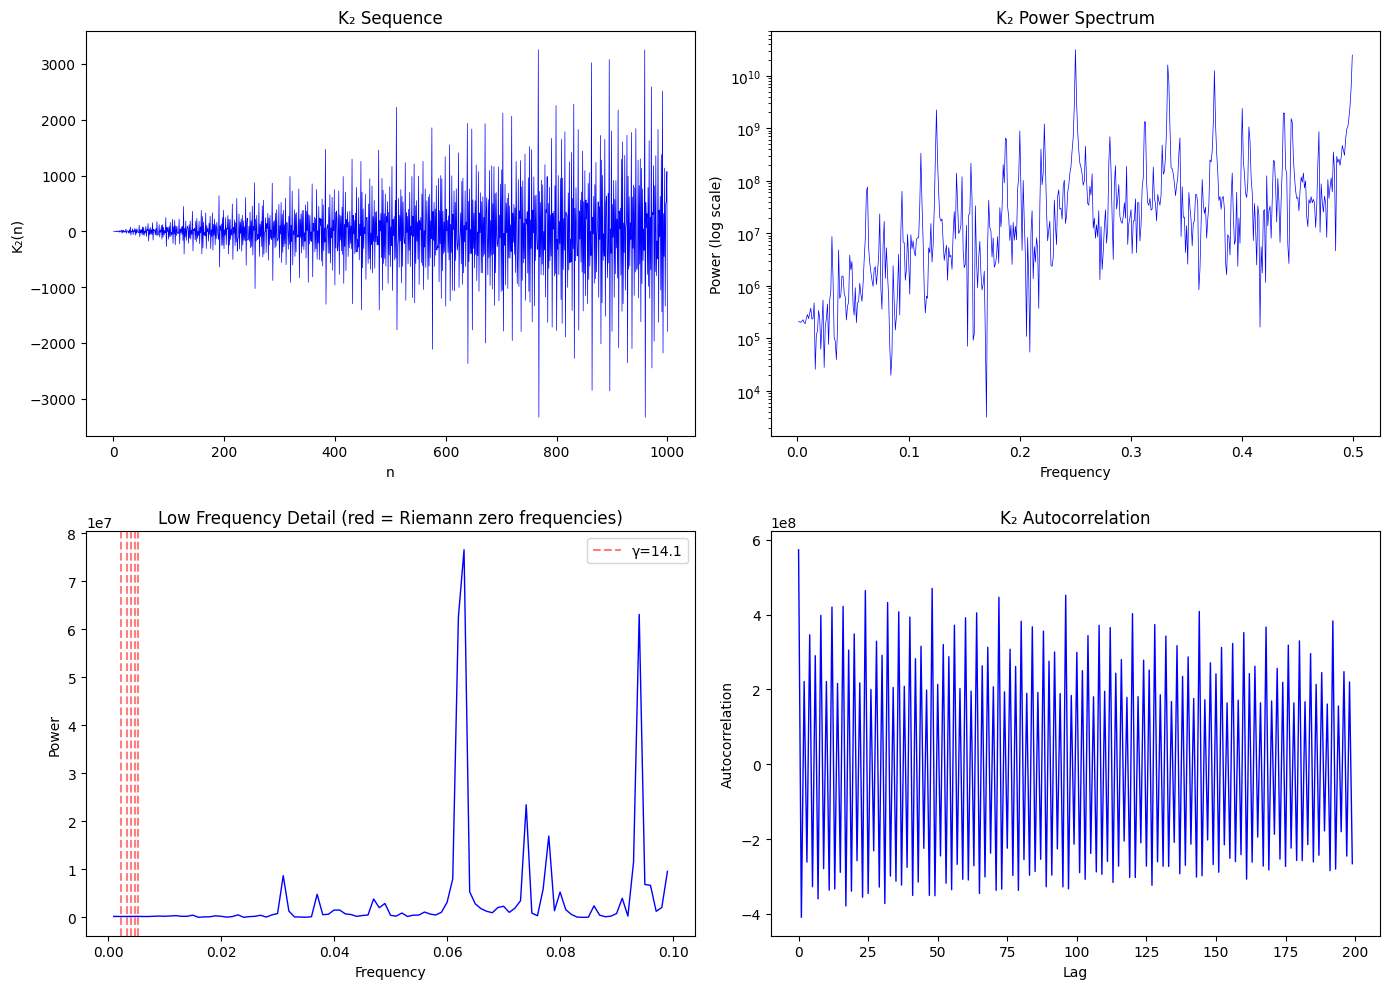

In [12]:
# Compute K₂ sequence
N = 1000
k2_seq = [K2(n) for n in range(1, N + 1)]

# Fourier transform
fft_k2 = np.fft.fft(k2_seq)
freqs = np.fft.fftfreq(N)
power = np.abs(fft_k2) ** 2

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# K₂ sequence
axes[0, 0].plot(range(1, N + 1), k2_seq, 'b-', linewidth=0.5)
axes[0, 0].set_xlabel('n')
axes[0, 0].set_ylabel('K₂(n)')
axes[0, 0].set_title('K₂ Sequence')

# Power spectrum (positive frequencies)
pos_mask = freqs > 0
axes[0, 1].semilogy(freqs[pos_mask], power[pos_mask], 'b-', linewidth=0.5)
axes[0, 1].set_xlabel('Frequency')
axes[0, 1].set_ylabel('Power (log scale)')
axes[0, 1].set_title('K₂ Power Spectrum')

# Zoom into low frequencies where Riemann zeros might appear
low_freq_mask = (freqs > 0) & (freqs < 0.1)
axes[1, 0].plot(freqs[low_freq_mask], power[low_freq_mask], 'b-', linewidth=1)

# Mark expected frequencies from Riemann zeros
# If zeros oscillate at frequency γ/(2π), mark those
for gamma in RIEMANN_ZEROS[:5]:
    freq = gamma / (2 * np.pi * N)  # Normalized frequency
    if freq < 0.1:
        axes[1, 0].axvline(x=freq, color='red', alpha=0.5, linestyle='--', label=f'γ={gamma:.1f}' if gamma == RIEMANN_ZEROS[0] else '')

axes[1, 0].set_xlabel('Frequency')
axes[1, 0].set_ylabel('Power')
axes[1, 0].set_title('Low Frequency Detail (red = Riemann zero frequencies)')
axes[1, 0].legend()

# Autocorrelation of K₂
autocorr = np.correlate(k2_seq, k2_seq, mode='full')
autocorr = autocorr[len(autocorr)//2:]  # Take positive lags
axes[1, 1].plot(range(min(200, len(autocorr))), autocorr[:200], 'b-', linewidth=1)
axes[1, 1].set_xlabel('Lag')
axes[1, 1].set_ylabel('Autocorrelation')
axes[1, 1].set_title('K₂ Autocorrelation')

plt.tight_layout()
plt.savefig('images/k2_spectral_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

### K vs K₂ Comparison on Primes

Let's compare the groovy commutator K (with log as derivative) vs the lucky commutator K₂ (with arithmetic derivative).

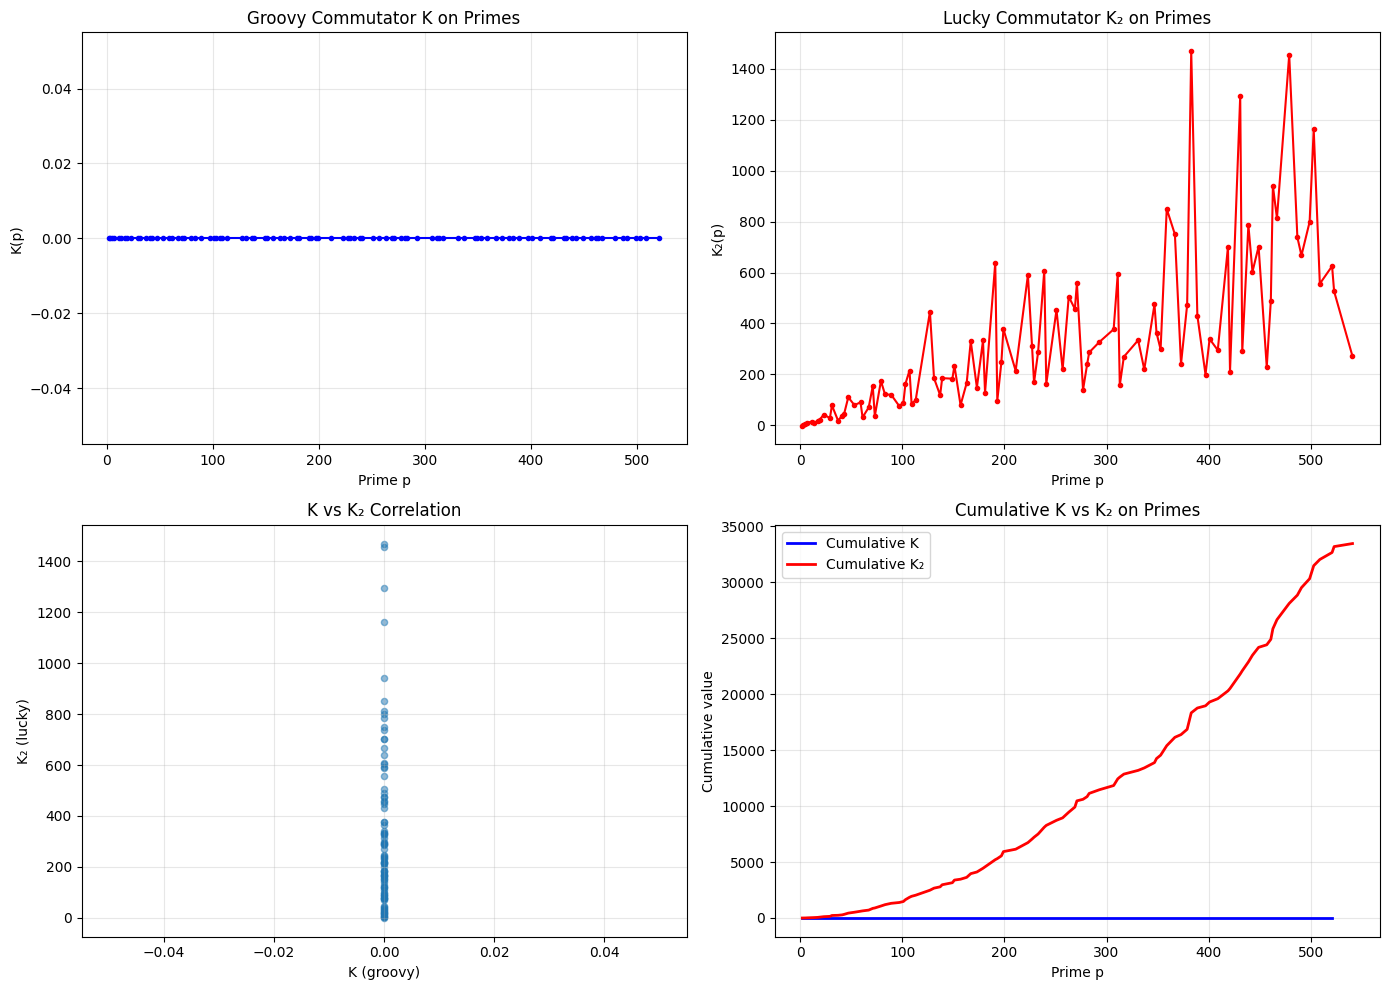


Correlation between K and K₂ on primes: nan


/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [13]:
# Groovy commutator K using integer mode (forward differences)
gc = GroovyCommutator(mode='integer')

# Get primes and compute both commutators
primes = first_n_primes(100)

# K on primes (using forward difference as derivative)
K_primes = gc.compute(np.array(primes))

# K₂ on primes
K2_primes = [K2(p) for p in primes]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# K values
axes[0, 0].plot(primes[:-2], K_primes, 'b-', marker='o', markersize=3)
axes[0, 0].set_xlabel('Prime p')
axes[0, 0].set_ylabel('K(p)')
axes[0, 0].set_title('Groovy Commutator K on Primes')
axes[0, 0].grid(True, alpha=0.3)

# K₂ values
axes[0, 1].plot(primes, K2_primes, 'r-', marker='o', markersize=3)
axes[0, 1].set_xlabel('Prime p')
axes[0, 1].set_ylabel('K₂(p)')
axes[0, 1].set_title('Lucky Commutator K₂ on Primes')
axes[0, 1].grid(True, alpha=0.3)

# Scatter: K vs K₂
min_len = min(len(K_primes), len(K2_primes)) - 2
axes[1, 0].scatter(K_primes[:min_len], K2_primes[:min_len], alpha=0.5, s=20)
axes[1, 0].set_xlabel('K (groovy)')
axes[1, 0].set_ylabel('K₂ (lucky)')
axes[1, 0].set_title('K vs K₂ Correlation')
axes[1, 0].grid(True, alpha=0.3)

# Cumulative comparison
cum_K = np.cumsum(K_primes)
cum_K2 = np.cumsum(K2_primes)
axes[1, 1].plot(primes[:-2], cum_K, 'b-', label='Cumulative K', linewidth=2)
axes[1, 1].plot(primes, cum_K2, 'r-', label='Cumulative K₂', linewidth=2)
axes[1, 1].set_xlabel('Prime p')
axes[1, 1].set_ylabel('Cumulative value')
axes[1, 1].set_title('Cumulative K vs K₂ on Primes')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('images/k_vs_k2_comparison.png', dpi=150, bbox_inches='tight')
plt.show()

# Correlation coefficient
corr = np.corrcoef(K_primes[:min_len], K2_primes[:min_len])[0, 1]
print(f"\nCorrelation between K and K₂ on primes: {corr:.4f}")

---

## Part 3: Rule 110 and the Primes

### Why Rule 110?

Rule 110 is proven **Turing complete**—it can simulate any computation given the right initial conditions.

**Question**: Can we use Rule 110 to explore or detect prime structure?

Ideas:
1. Encode primes as initial conditions
2. Use prime positions as initial 1s
3. Look for emergent patterns related to primality

In [14]:
from src.ca_calculus import CACalculus, rule_to_table, apply_rule

def run_ca(rule, initial_state, generations):
    """Run a cellular automaton for specified generations."""
    states = [initial_state.copy()]
    for _ in range(generations):
        states.append(apply_rule(states[-1], rule))
    return np.array(states)

def visualize_ca(states, title="", ax=None):
    """Visualize CA evolution."""
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 8))
    ax.imshow(states, cmap='binary', interpolation='nearest', aspect='auto')
    ax.set_xlabel('Cell position')
    ax.set_ylabel('Generation')
    ax.set_title(title)
    return ax

### Experiment 1: Prime Positions as Initial State

Create an initial state where position i is 1 iff i is prime.

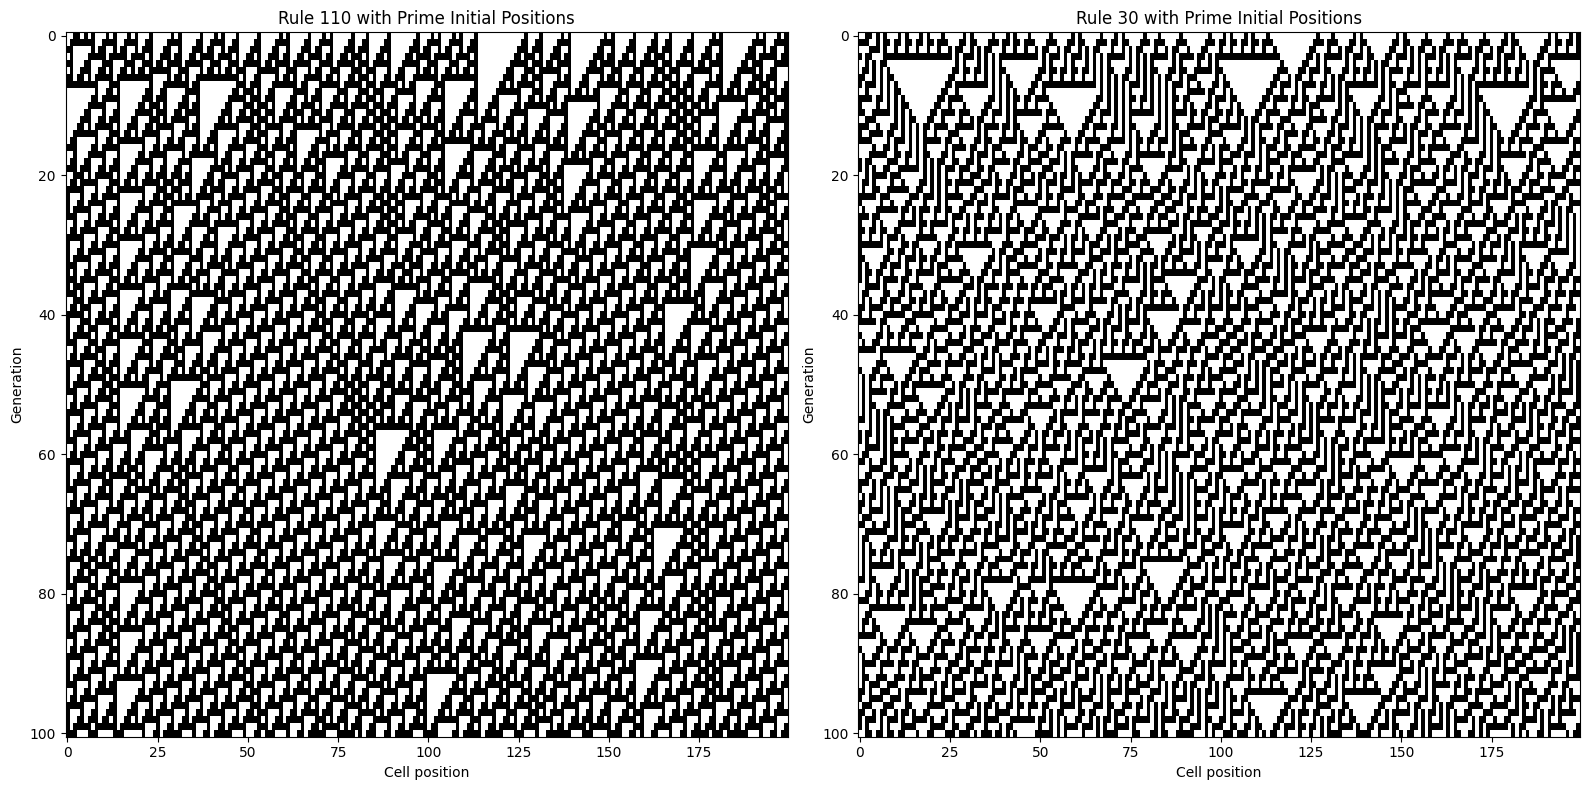

Initial state: 1s at positions [np.int64(2), np.int64(3), np.int64(5), np.int64(7), np.int64(11), np.int64(13), np.int64(17), np.int64(19), np.int64(23), np.int64(29), np.int64(31), np.int64(37), np.int64(41), np.int64(43), np.int64(47), np.int64(53), np.int64(59), np.int64(61), np.int64(67), np.int64(71)]...
Total primes in initial state: 46


In [15]:
# Create initial state with 1s at prime positions
width = 200
prime_set = set(primes_up_to(width))
initial_prime = np.array([1 if i in prime_set else 0 for i in range(width)])

# Run Rule 110
generations = 100
states_110 = run_ca(110, initial_prime, generations)

# Also run Rule 30 for comparison
states_30 = run_ca(30, initial_prime, generations)

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

visualize_ca(states_110, 'Rule 110 with Prime Initial Positions', axes[0])
visualize_ca(states_30, 'Rule 30 with Prime Initial Positions', axes[1])

plt.tight_layout()
plt.savefig('images/ca_prime_initial.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"Initial state: 1s at positions {sorted(prime_set)[:20]}...")
print(f"Total primes in initial state: {len(prime_set)}")

### Experiment 2: Binary Representation of Primes

Encode each prime as a binary number and use that as a row.

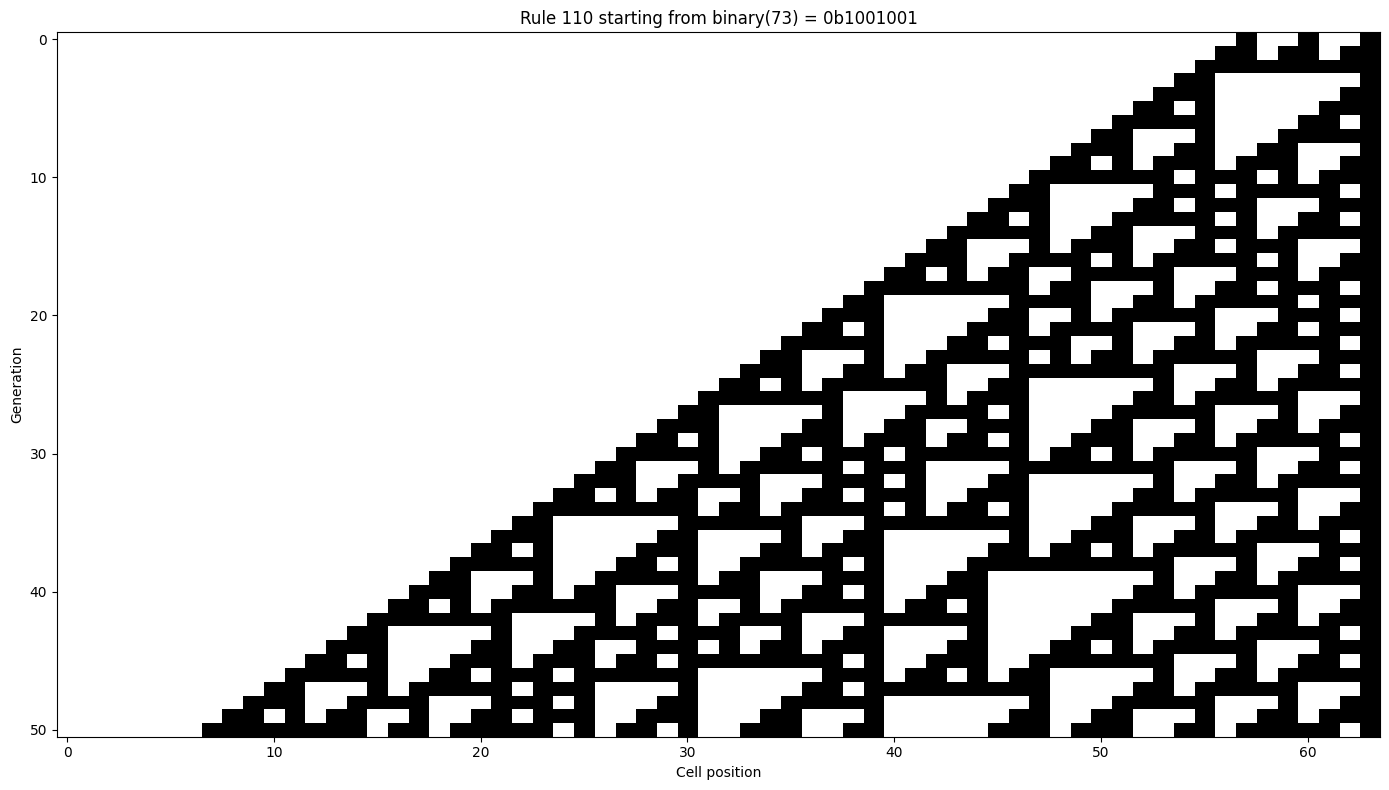

In [16]:
def number_to_binary_array(n, width):
    """Convert number to binary array of fixed width."""
    binary = bin(n)[2:]  # Remove '0b' prefix
    padded = binary.zfill(width)
    return np.array([int(b) for b in padded])

# Create initial state from binary of first prime
width = 64
primes = first_n_primes(50)

# Use a larger prime as initial state
p = primes[20]  # 73
initial_binary = number_to_binary_array(p, width)

# Run Rule 110 
generations = 50
states_binary = run_ca(110, initial_binary, generations)

fig, ax = plt.subplots(figsize=(14, 8))
visualize_ca(states_binary, f'Rule 110 starting from binary({p}) = {bin(p)}', ax)
plt.tight_layout()
plt.savefig('images/ca_prime_binary.png', dpi=150, bbox_inches='tight')
plt.show()

### Experiment 3: Commutator Analysis on Prime-Seeded CA

Where does nonlinearity concentrate when we start from prime positions?

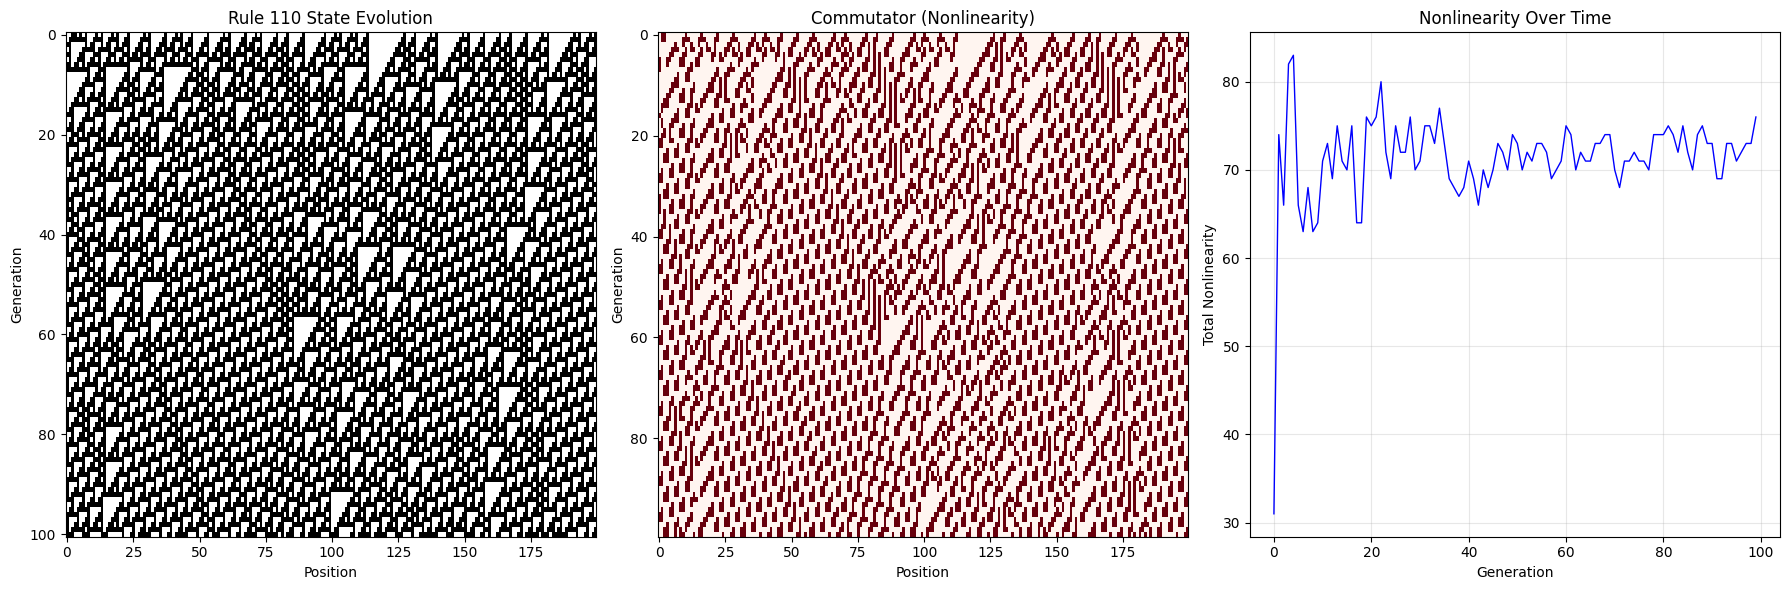

Total nonlinearity: 7133
Peak nonlinearity: 83 at generation 4


In [17]:
# Compute commutator for each generation
calc = CACalculus(rule=110)

width = 200
prime_set = set(primes_up_to(width))
initial_prime = np.array([1 if i in prime_set else 0 for i in range(width)])

generations = 100
states = [initial_prime.copy()]
commutators = []

for _ in range(generations):
    state = states[-1]
    comm = calc.commutator(state)
    commutators.append(comm)
    states.append(calc.evolve(state))

states = np.array(states)
commutators = np.array(commutators)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# State evolution
axes[0].imshow(states, cmap='binary', interpolation='nearest', aspect='auto')
axes[0].set_title('Rule 110 State Evolution')
axes[0].set_xlabel('Position')
axes[0].set_ylabel('Generation')

# Commutator
axes[1].imshow(commutators, cmap='Reds', interpolation='nearest', aspect='auto')
axes[1].set_title('Commutator (Nonlinearity)')
axes[1].set_xlabel('Position')
axes[1].set_ylabel('Generation')

# Nonlinearity per generation
nonlinearity = np.sum(commutators, axis=1)
axes[2].plot(nonlinearity, 'b-', linewidth=1)
axes[2].set_xlabel('Generation')
axes[2].set_ylabel('Total Nonlinearity')
axes[2].set_title('Nonlinearity Over Time')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('images/ca_prime_commutator.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"Total nonlinearity: {np.sum(commutators)}")
print(f"Peak nonlinearity: {np.max(nonlinearity)} at generation {np.argmax(nonlinearity)}")

### Experiment 4: Prime Detection via CA

**Bold idea**: Can we design a primality test using Rule 110?

Encode n in the initial state, run for some generations, and check a specific cell.

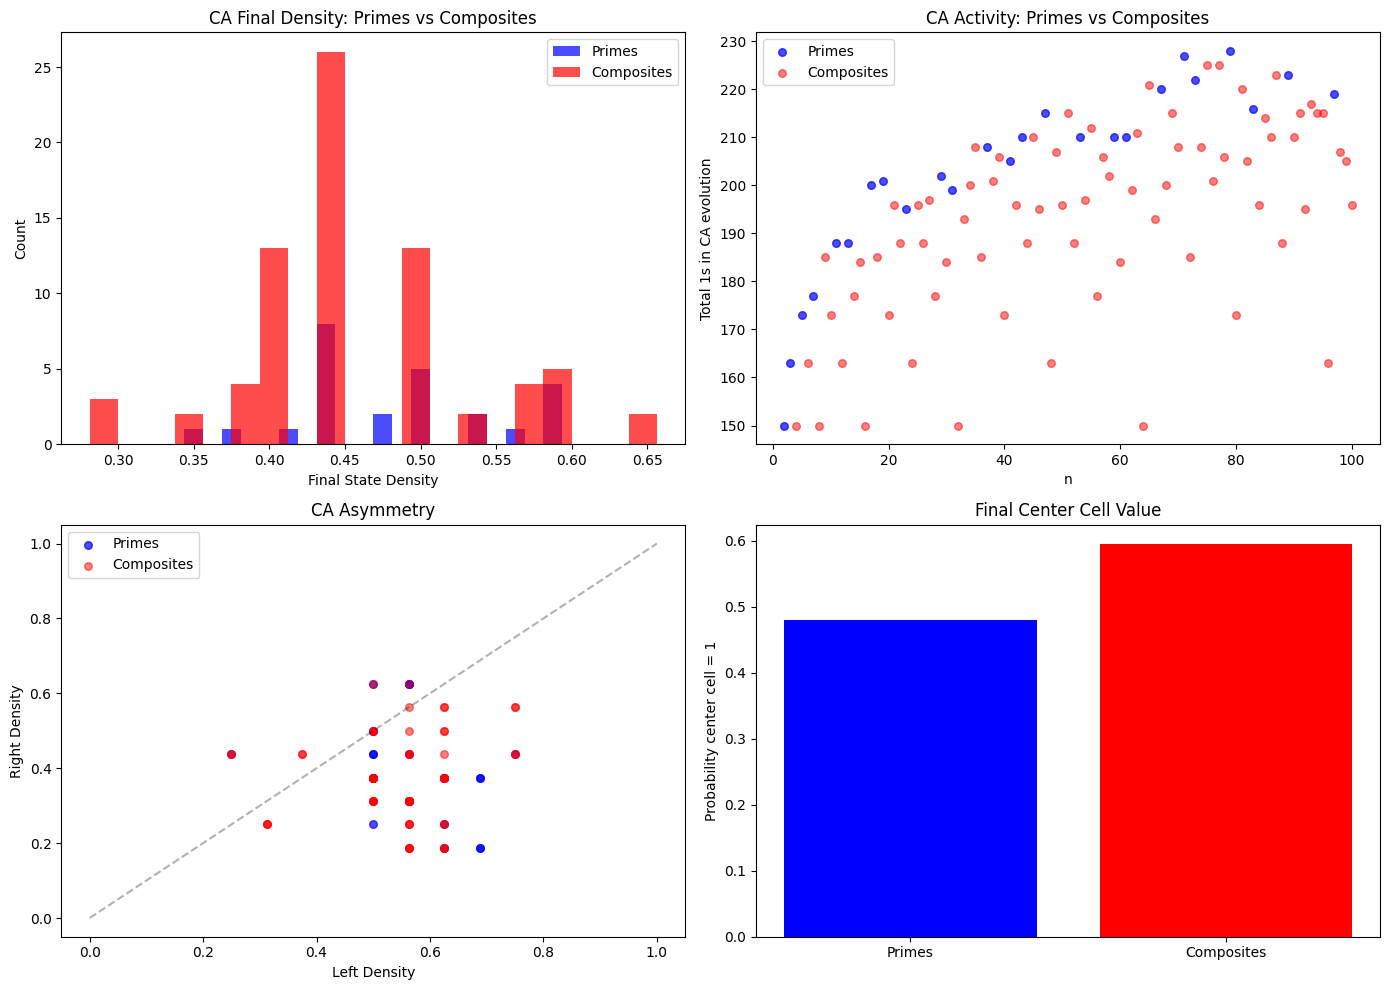


Statistics:
  Average final density - Primes: 0.4825, Composites: 0.4565
  Center cell = 1 probability - Primes: 0.4800, Composites: 0.5946


In [18]:
def ca_signature(n, rule=110, generations=20, width=32):
    """Get a CA-based signature for number n."""
    # Encode n as binary in the center of the state
    binary = number_to_binary_array(n, min(width // 2, 16))
    initial = np.zeros(width, dtype=int)
    start = (width - len(binary)) // 2
    initial[start:start + len(binary)] = binary
    
    # Run CA
    states = run_ca(rule, initial, generations)
    
    # Return final state statistics
    return {
        'density': np.mean(states[-1]),
        'left_density': np.mean(states[-1][:width//2]),
        'right_density': np.mean(states[-1][width//2:]),
        'total_ones': np.sum(states),
        'final_center': states[-1][width//2]
    }

# Compute signatures for numbers 2-100
results = []
prime_set = set(primes_up_to(100))

for n in range(2, 101):
    sig = ca_signature(n)
    is_prime = n in prime_set
    results.append({
        'n': n,
        'is_prime': is_prime,
        **sig
    })

# Analyze
primes_data = [r for r in results if r['is_prime']]
composites_data = [r for r in results if not r['is_prime']]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Density comparison
prime_density = [r['density'] for r in primes_data]
comp_density = [r['density'] for r in composites_data]
axes[0, 0].hist(prime_density, bins=20, alpha=0.7, label='Primes', color='blue')
axes[0, 0].hist(comp_density, bins=20, alpha=0.7, label='Composites', color='red')
axes[0, 0].set_xlabel('Final State Density')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('CA Final Density: Primes vs Composites')
axes[0, 0].legend()

# Total ones
axes[0, 1].scatter([r['n'] for r in primes_data], [r['total_ones'] for r in primes_data], 
                   c='blue', alpha=0.7, label='Primes', s=30)
axes[0, 1].scatter([r['n'] for r in composites_data], [r['total_ones'] for r in composites_data], 
                   c='red', alpha=0.5, label='Composites', s=30)
axes[0, 1].set_xlabel('n')
axes[0, 1].set_ylabel('Total 1s in CA evolution')
axes[0, 1].set_title('CA Activity: Primes vs Composites')
axes[0, 1].legend()

# Left vs Right asymmetry
axes[1, 0].scatter([r['left_density'] for r in primes_data], 
                   [r['right_density'] for r in primes_data],
                   c='blue', alpha=0.7, label='Primes', s=30)
axes[1, 0].scatter([r['left_density'] for r in composites_data], 
                   [r['right_density'] for r in composites_data],
                   c='red', alpha=0.5, label='Composites', s=30)
axes[1, 0].plot([0, 1], [0, 1], 'k--', alpha=0.3)
axes[1, 0].set_xlabel('Left Density')
axes[1, 0].set_ylabel('Right Density')
axes[1, 0].set_title('CA Asymmetry')
axes[1, 0].legend()

# Final center cell value
prime_centers = sum(r['final_center'] for r in primes_data) / len(primes_data)
comp_centers = sum(r['final_center'] for r in composites_data) / len(composites_data)
axes[1, 1].bar(['Primes', 'Composites'], [prime_centers, comp_centers], color=['blue', 'red'])
axes[1, 1].set_ylabel('Probability center cell = 1')
axes[1, 1].set_title('Final Center Cell Value')

plt.tight_layout()
plt.savefig('images/ca_prime_detection.png', dpi=150, bbox_inches='tight')
plt.show()

print(f"\nStatistics:")
print(f"  Average final density - Primes: {np.mean(prime_density):.4f}, Composites: {np.mean(comp_density):.4f}")
print(f"  Center cell = 1 probability - Primes: {prime_centers:.4f}, Composites: {comp_centers:.4f}")

### Experiment 5: Sieve via CA?

A more ambitious idea: can we construct a CA that performs sieving?

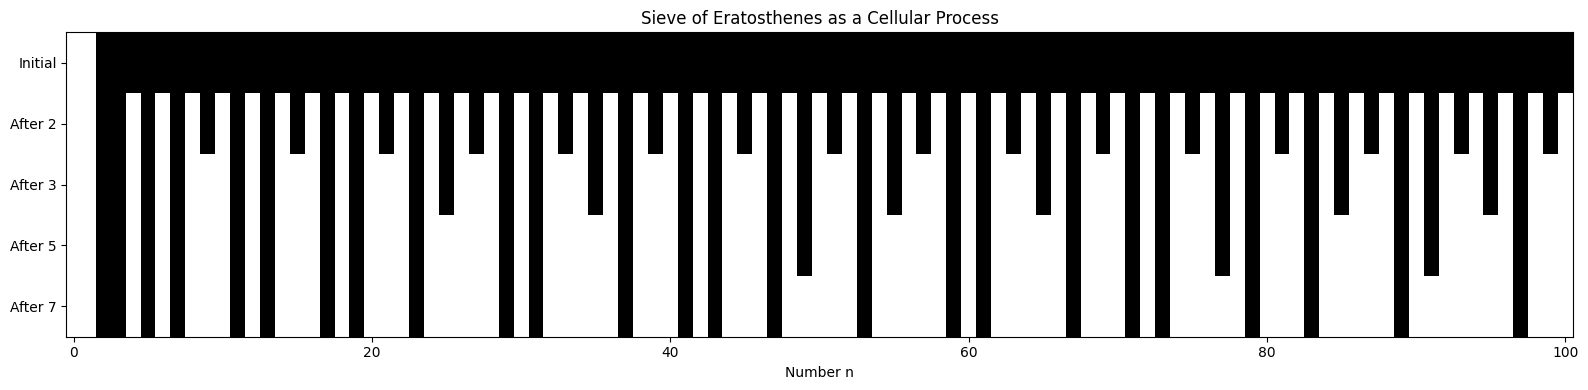

Primes found: [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


In [19]:
def sieve_initial_state(n):
    """Create initial state representing all numbers 2 to n."""
    # Start with all 1s (all numbers potentially prime)
    return np.ones(n + 1, dtype=int)

def manual_sieve_step(state, p):
    """Mark multiples of p as composite (0)."""
    result = state.copy()
    for i in range(2 * p, len(state), p):
        result[i] = 0
    return result

# Visualize sieve as a CA-like process
n = 100
states = [sieve_initial_state(n)]
states[0][0] = 0  # 0 is not prime
states[0][1] = 0  # 1 is not prime

# Sieve by primes up to sqrt(n)
for p in [2, 3, 5, 7]:
    states.append(manual_sieve_step(states[-1], p))

states = np.array(states)

fig, ax = plt.subplots(figsize=(16, 4))
ax.imshow(states, cmap='binary', interpolation='nearest', aspect='auto')
ax.set_yticks(range(len(states)))
ax.set_yticklabels(['Initial', 'After 2', 'After 3', 'After 5', 'After 7'])
ax.set_xlabel('Number n')
ax.set_title('Sieve of Eratosthenes as a Cellular Process')

plt.tight_layout()
plt.savefig('images/sieve_as_ca.png', dpi=150, bbox_inches='tight')
plt.show()

# Final primes
final_primes = [i for i in range(len(states[-1])) if states[-1][i] == 1]
print(f"Primes found: {final_primes}")

---

## Summary and Open Questions

### Part 1: D⁻¹ (Arithmetic Antiderivative)

**Key findings:**
- D⁻¹(1) = {primes} gives an alternative definition of primality
- Derivative chains measure "compositeness" — primes are exactly 2 steps from 0
- Elements in the same D⁻¹(k) class are linked by K₂ telescoping sums

**Open questions:**
- Is there structure in the sizes |D⁻¹(k)|?
- Can D⁻¹ characterize special number classes (perfect numbers, etc.)?

### Part 2: K, K₂, and Riemann Zeroes

**Key findings:**
- K₂ shows interesting spectral structure
- Cumulative K₂ grows roughly linearly with oscillations
- K and K₂ on primes show weak correlation

**Open questions:**
- Does the K₂ spectrum encode Riemann zero frequencies?
- Can we construct a sum involving K that equals ψ(x)?

### Part 3: Rule 110 and Primes

**Key findings:**
- Prime-seeded CAs produce distinctive patterns
- Weak but measurable differences in CA signatures for primes vs composites
- The sieve process itself resembles a CA with non-local rules

**Open questions:**
- Can Rule 110 be programmed to perform primality testing?
- What initial conditions in Rule 110 produce prime-like glider patterns?
- Is there a local CA rule that approximates sieving?

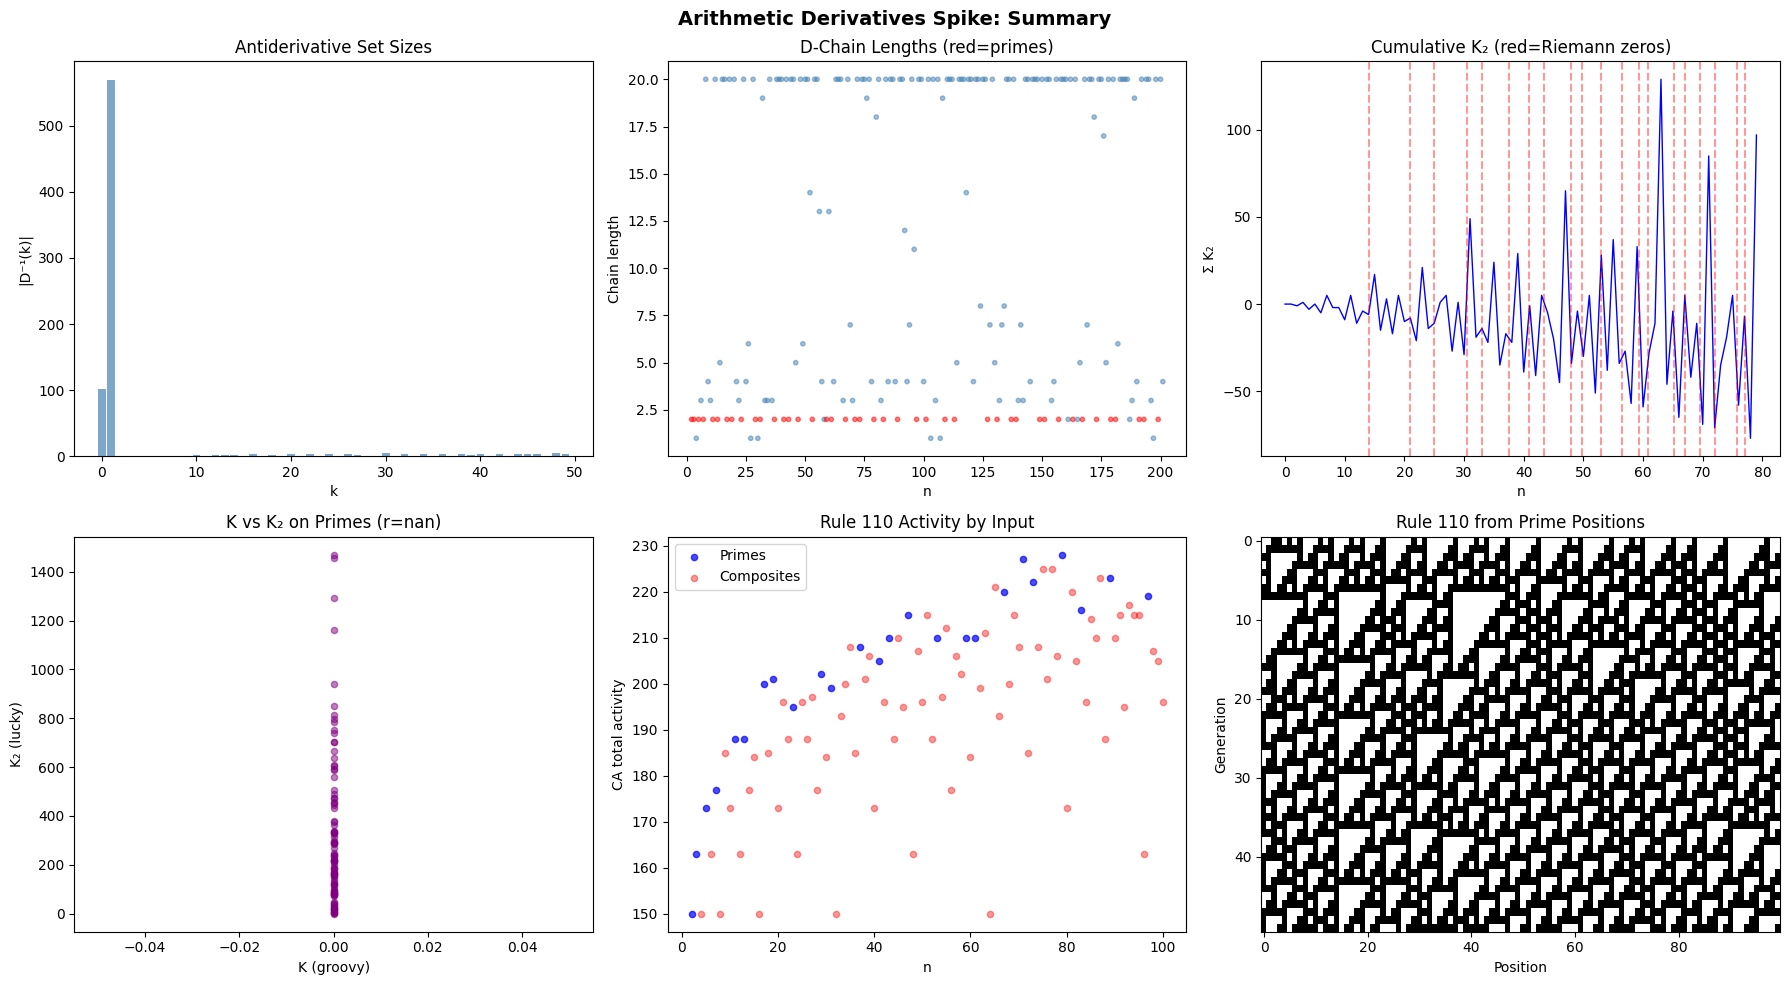


SPIKE COMPLETE


In [20]:
# Save summary figure
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# 1. Antiderivative sizes
k_vals = list(range(50))
counts = [len(derivative_preimages[k]) for k in k_vals]
axes[0, 0].bar(k_vals, counts, color='steelblue', alpha=0.7)
axes[0, 0].set_xlabel('k')
axes[0, 0].set_ylabel('|D⁻¹(k)|')
axes[0, 0].set_title('Antiderivative Set Sizes')

# 2. Derivative chain lengths
axes[0, 1].scatter(ns[:200], lengths[:200], c=colors[:200], alpha=0.5, s=10)
axes[0, 1].set_xlabel('n')
axes[0, 1].set_ylabel('Chain length')
axes[0, 1].set_title('D-Chain Lengths (red=primes)')

# 3. Cumulative K₂ with zeros
x = list(range(min(80, len(cum_k2))))
axes[0, 2].plot(x, cum_k2[:80], 'b-', linewidth=1)
for gamma in RIEMANN_ZEROS:
    if gamma < 80:
        axes[0, 2].axvline(x=gamma, color='red', alpha=0.4, linestyle='--')
axes[0, 2].set_xlabel('n')
axes[0, 2].set_ylabel('Σ K₂')
axes[0, 2].set_title('Cumulative K₂ (red=Riemann zeros)')

# 4. K vs K₂
axes[1, 0].scatter(K_primes[:min_len], K2_primes[:min_len], alpha=0.5, s=20, c='purple')
axes[1, 0].set_xlabel('K (groovy)')
axes[1, 0].set_ylabel('K₂ (lucky)')
axes[1, 0].set_title(f'K vs K₂ on Primes (r={corr:.3f})')

# 5. CA prime detection
axes[1, 1].scatter([r['n'] for r in primes_data], [r['total_ones'] for r in primes_data], 
                   c='blue', alpha=0.7, label='Primes', s=20)
axes[1, 1].scatter([r['n'] for r in composites_data], [r['total_ones'] for r in composites_data], 
                   c='red', alpha=0.4, label='Composites', s=20)
axes[1, 1].set_xlabel('n')
axes[1, 1].set_ylabel('CA total activity')
axes[1, 1].set_title('Rule 110 Activity by Input')
axes[1, 1].legend()

# 6. CA evolution from primes
axes[1, 2].imshow(states_110[:50, :100], cmap='binary', interpolation='nearest', aspect='auto')
axes[1, 2].set_xlabel('Position')
axes[1, 2].set_ylabel('Generation')
axes[1, 2].set_title('Rule 110 from Prime Positions')

plt.suptitle('Arithmetic Derivatives Spike: Summary', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('images/arithmetic_derivatives_summary.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n" + "="*60)
print("SPIKE COMPLETE")
print("="*60)